In [ ]:
import numpy as np
import pandas as pd
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv', names = ['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content','Genres','Last Update','Current Version','Android Version'],encoding = 'UTF-8')

In [ ]:
data = data.drop(0,axis=0)

In [ ]:
datarv= pd.read_csv('/content/drive/MyDrive/googleplaystore_user_reviews.csv',names = ['App','Translated','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],encoding = 'UTF-8')

In [ ]:
mgdata = pd.merge(data,datarv,how = 'outer')
#리뷰데이터와 그냥 데이터 합침

In [ ]:
mgdata = mgdata.dropna(subset = ['Translated'])
mgdata['Rating'].interpolate(method = 'linear')
mgdata.dropna(subset = ['Rating'])
#리뷰 없는 데이터 제거, 별점 보간(제거했는데 보간하는 이유... 혹시 몰라서)

3주차 Visualization

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

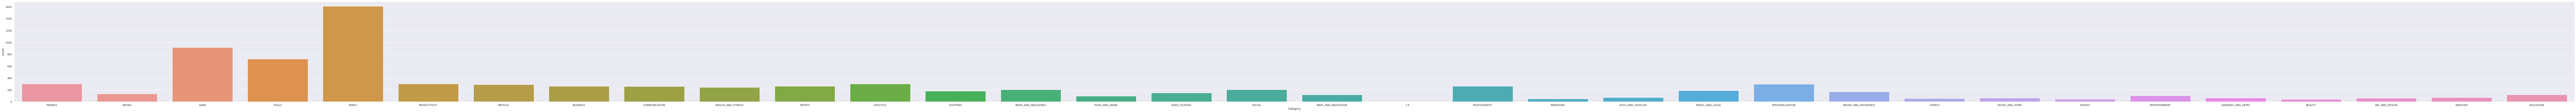

In [ ]:
sns.set(rc = {'figure.figsize':(200,8)})
data = data.drop_duplicates(['App'])
data.groupby(['Category']).agg({'App':['count']})
sns.countplot(data = data, x = 'Category')

plt.show()
#전체 앱 수 

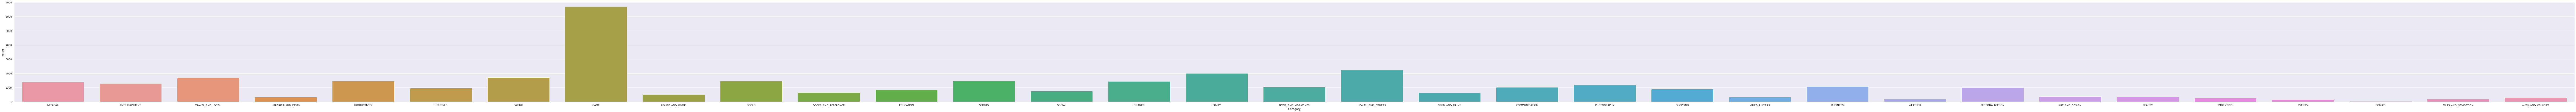

In [ ]:
sns.countplot(data = mgdata, x = 'Category')
sns.set(rc = {'figure.figsize':(80,50)})
plt.show()
#리뷰데이터 포함 수

In [ ]:
data = data.dropna(subset = ['Rating'])
data = data.sort_values(by = 'Rating')
data = data.dropna(subset = ['Reviews'])
data = data.dropna(subset = ['Installs'])
#리뷰, 인스톨, 별점, 안나온거 다 삭제

In [ ]:
data['Installs'].unique()
data = data.replace({'500+':'500','100+':'100','50+':'50','10+':'10','1,000+':'1000','1+':'1','50,000,000+':'50000000'})
data = data.replace({'5,000+':'5000','5+':'5','50,000+':'50000','100,000+':'100000','10,000+':'10000'})
data = data.replace({'500,000+':'500000','5,000,000+':'5000000','1,000,000+':'1000000','10,000,000+':'10000000'})
data = data.replace({'100,000,000+':'100000000','1,000,000,000+':'1000000000','500,000,000+':'500000000','Free':'0'})
data['Installs'].unique()

array(['500', '100', '50', '10', '1000', '5000', '5', '50000', '100000',
       '10000', '500000', '0', '5000000', '1000000', '10000000',
       '50000000', '100000000', '1000000000', '500000000', '1',
       'Installs'], dtype=object)

In [ ]:
data = data.astype({'Installs':'int'})
data = data.astype({'Rating':'float'})
#installs 숫자화

In [ ]:
data = data.replace({'3.0M':'3000000'})
data = data.astype({'Reviews':'int'})
#데이터 리뷰 개수 숫자화

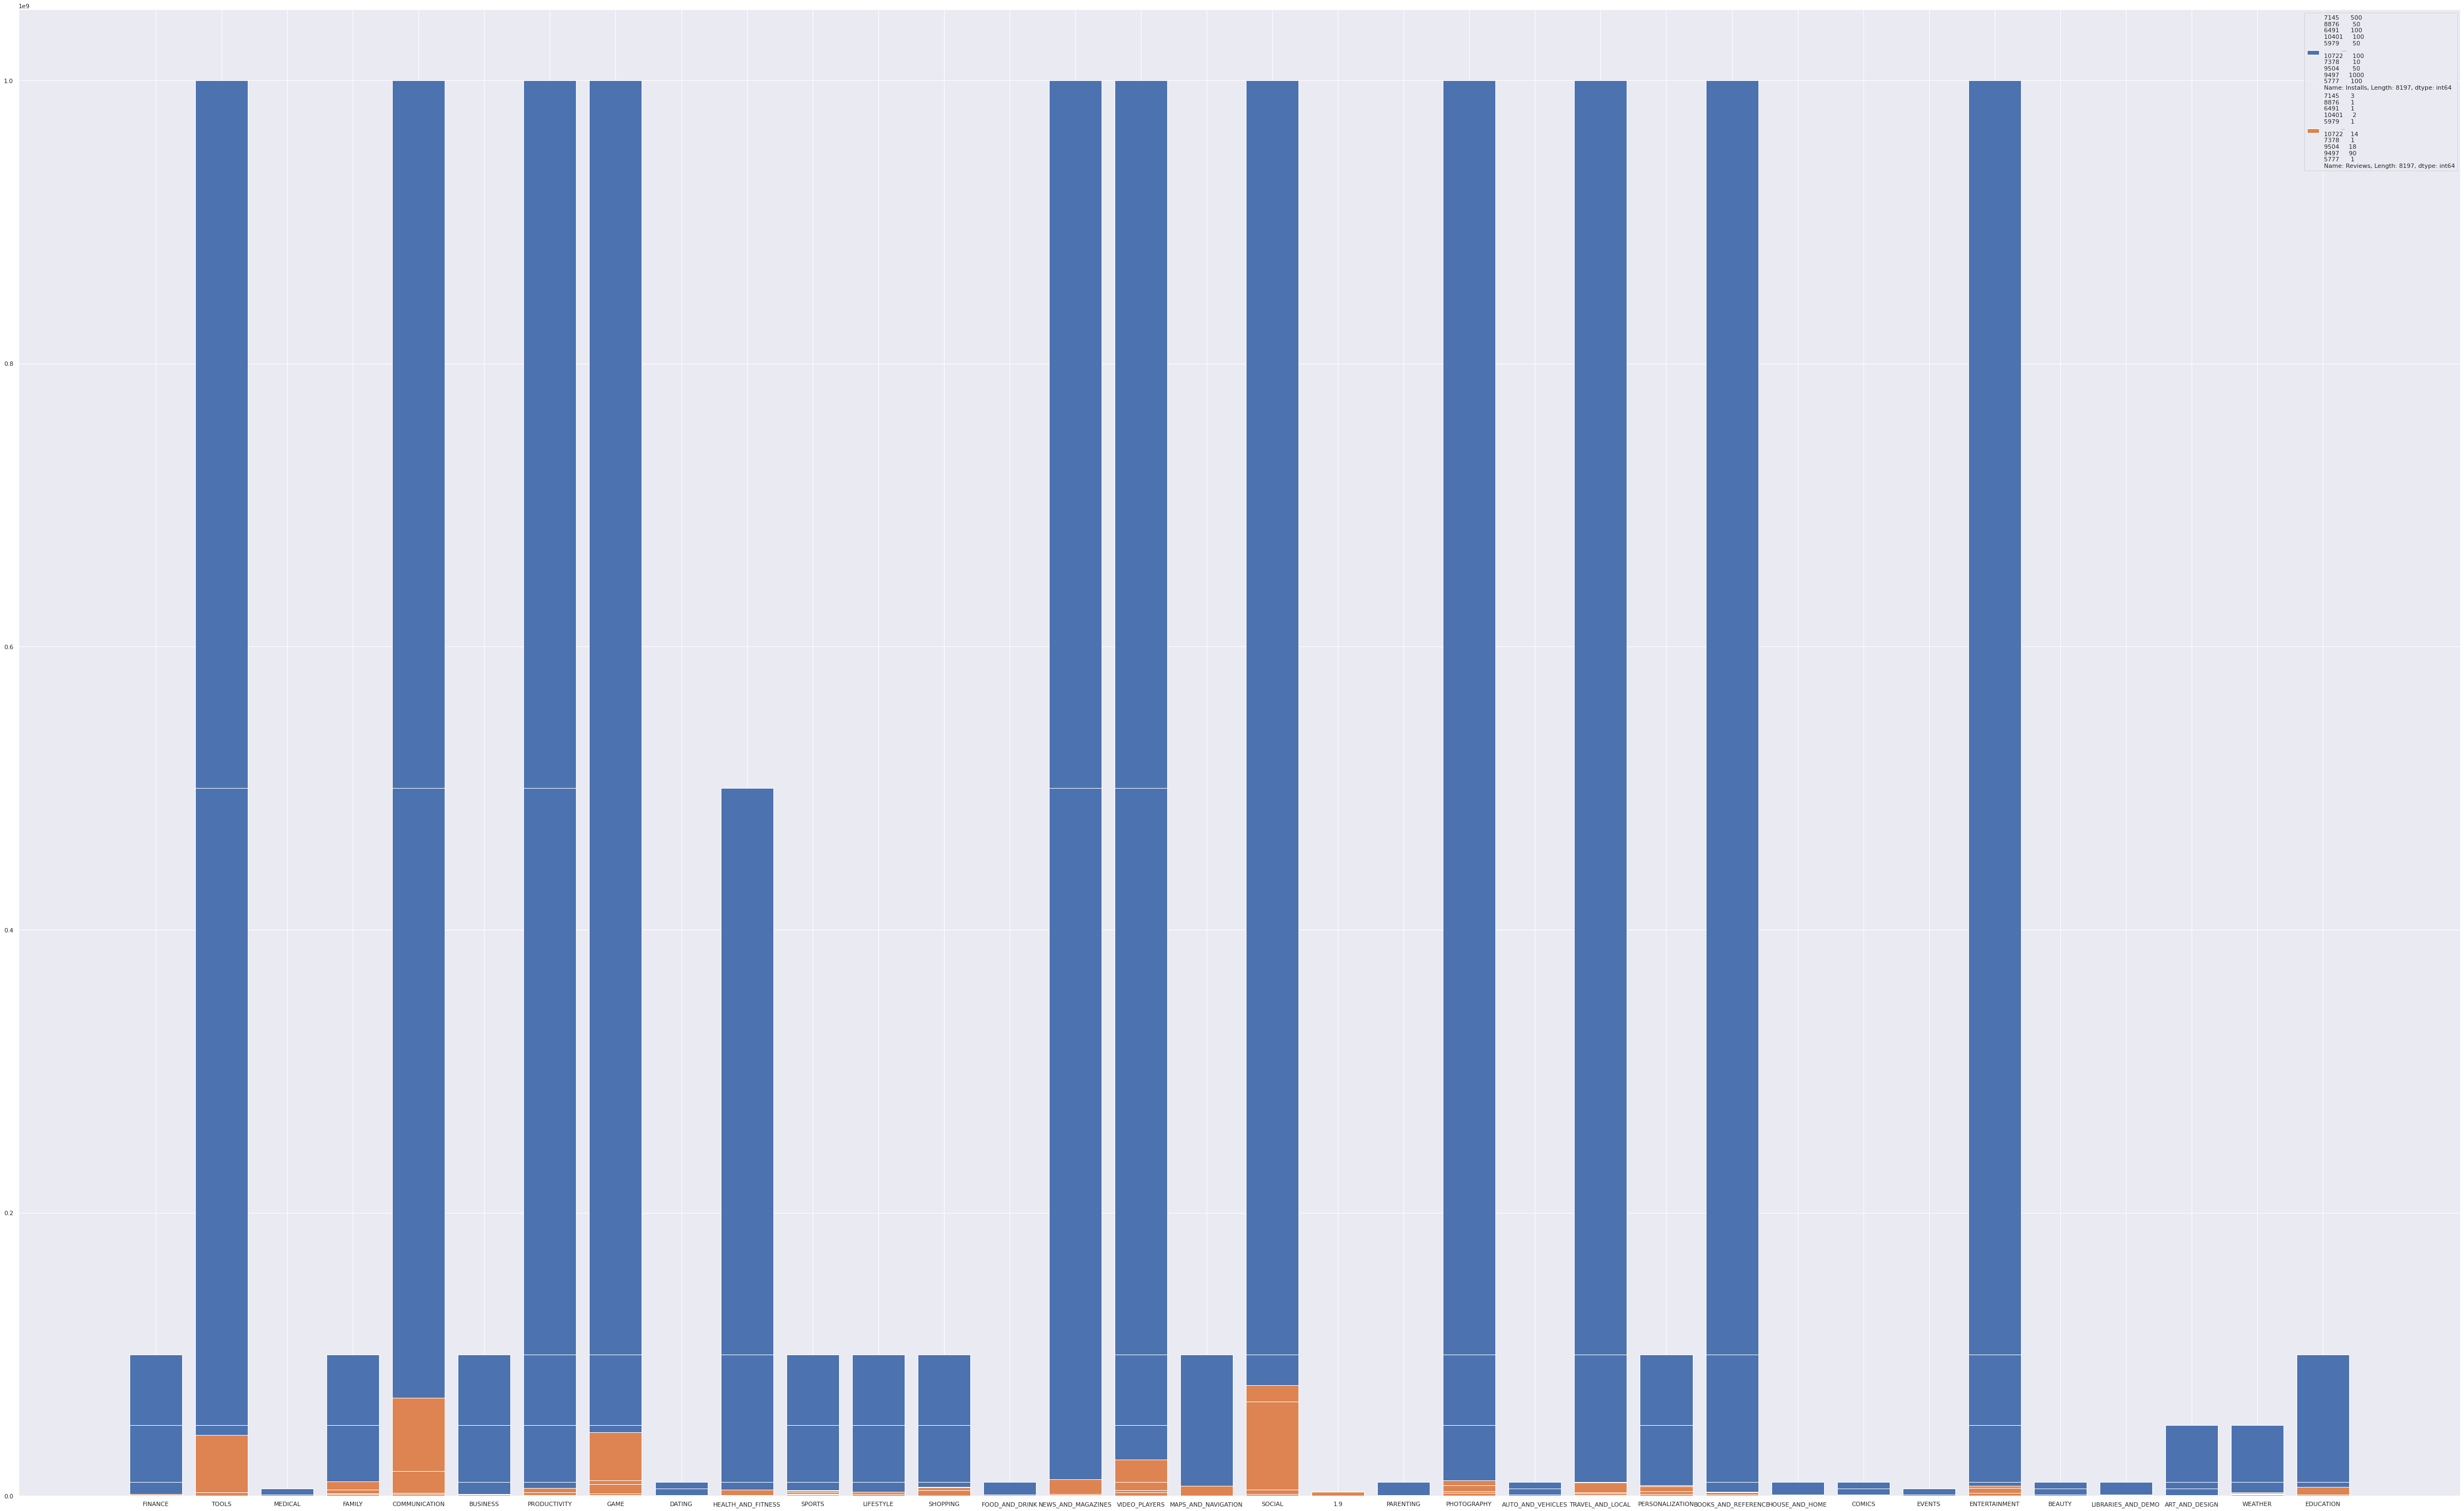

In [ ]:
plt.bar(data = data, x = 'Category',height = 'Installs',label = "Installs")
plt.bar(data = data, x = 'Category',height = 'Reviews', label = 'Reviews')
plt.legend()
plt.show()
#각 카테고리별 앱 수 대비 리뷰수 (잘 만든건지는 모르겠네요...)

In [ ]:
ratio = data['Installs']/data['Reviews']

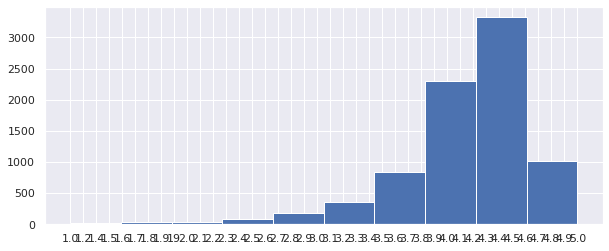

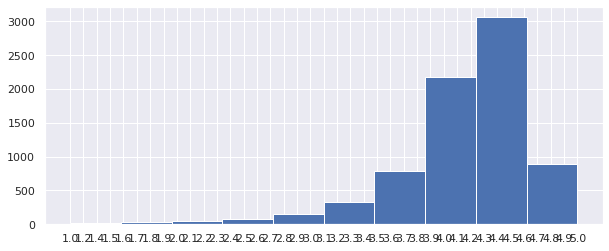

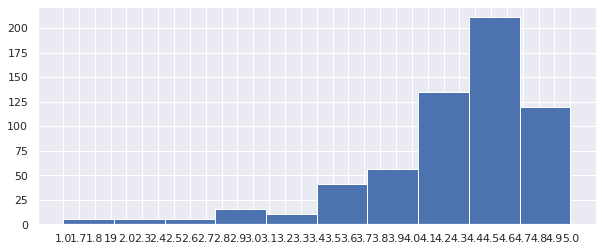

In [ ]:
free = data.loc[data['Price']=='0']
notfree =  data.loc[data['Price']!='0']
plt.rcParams['figure.figsize']=(10,4)
plt.hist(data['Rating'])
plt.show()
plt.hist(free['Rating'])
plt.show()
plt.hist(notfree['Rating'])
plt.show()
#전체/유료/무료 별점분포 #유료앱이 별점이 후함

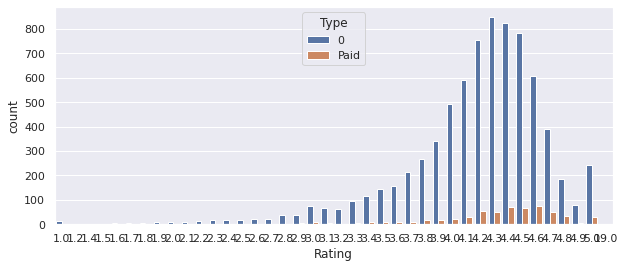

In [ ]:
 sns.countplot(data = data, x = 'Rating',hue = 'Type')
#그냥 앱/유료앱 개수 비교 #유료앱쪽이 아주 조금 더 높은 별점분포 보임 

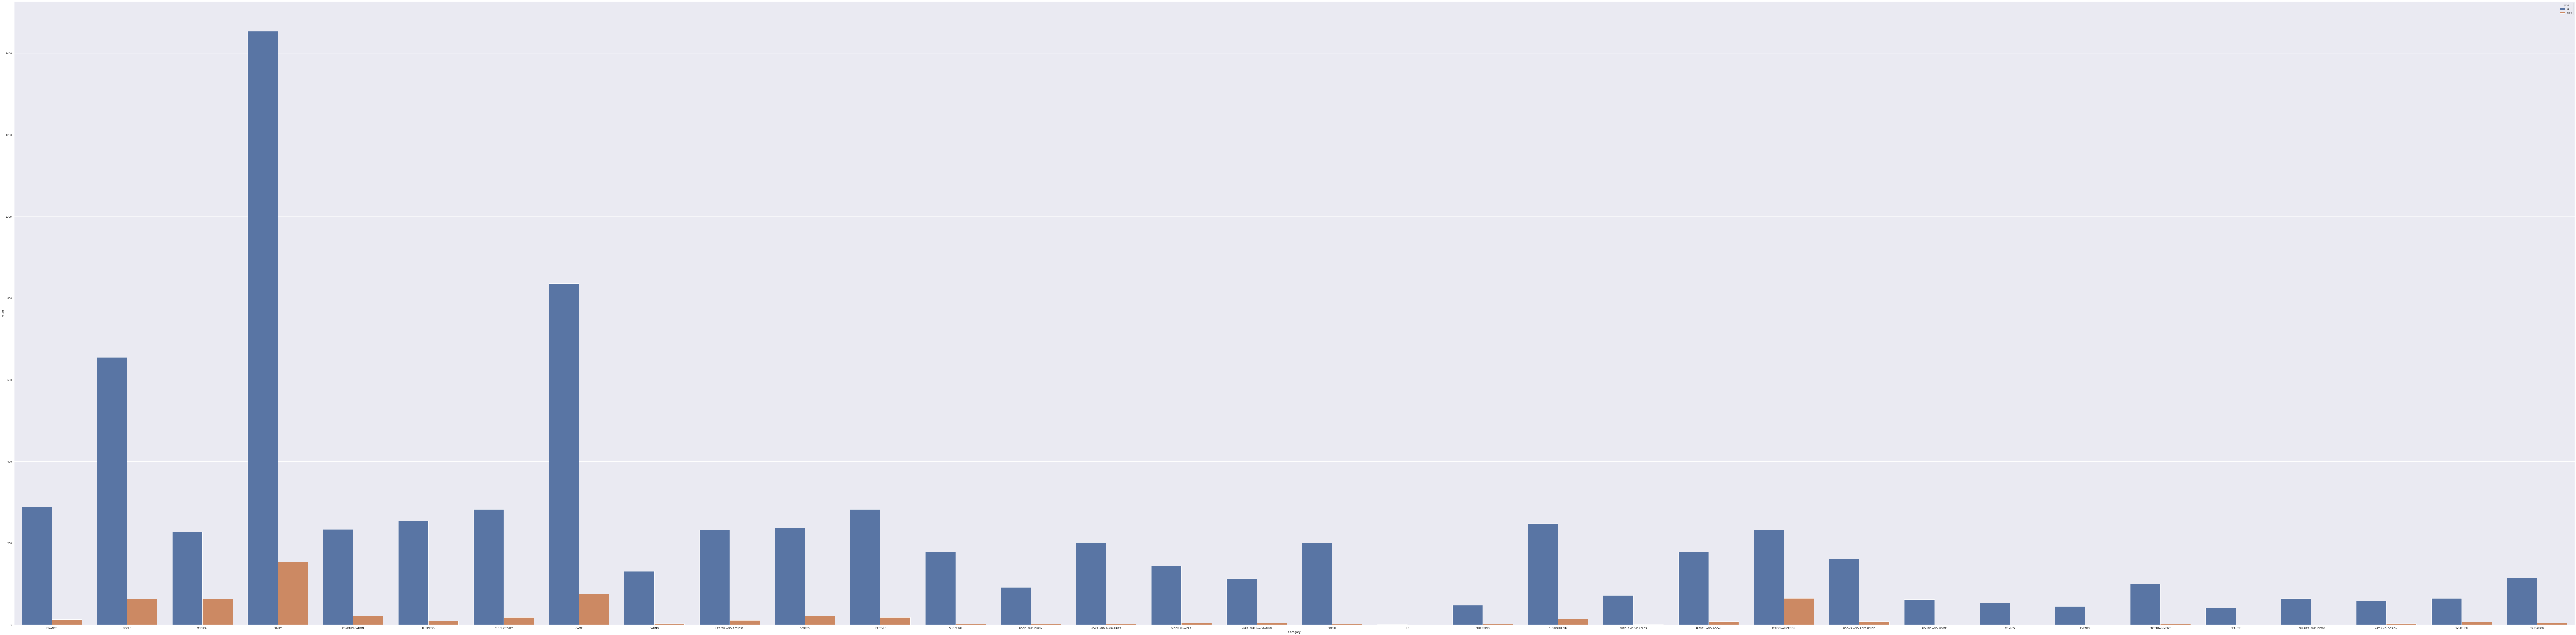

In [ ]:
sns.countplot(data = data, x = 'Category',hue = 'Type')
sns.set(rc = {'figure.figsize':(200,50)})
plt.show()
#family에 유료앱이 많음

In [ ]:
b = pd.pivot_table(data,index = 'Category',values = ['Installs','Rating']
                   ,aggfunc={'Installs':'count','Rating':'mean'})
c=b.sort_values(by=['Installs'])

In [ ]:
game = data.loc[data['Category']== 'GAME']
game = game.sort_values(by = 'Rating')
notgame = data.loc[data['Category']!= 'GAME']
notgame = notgame.sort_values(by = 'Rating')

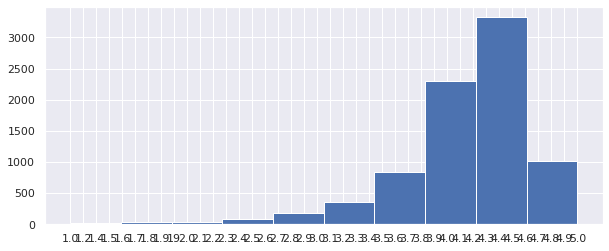

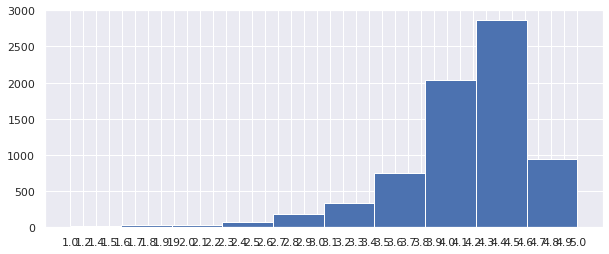

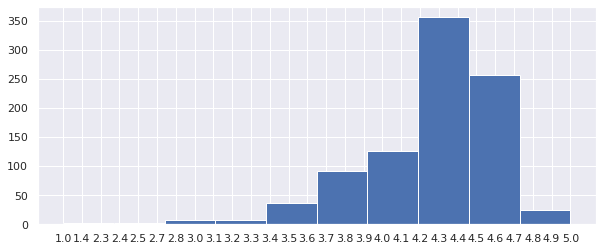

In [ ]:
plt.hist(data['Rating'])
plt.show()
plt.hist(notgame['Rating'])
plt.show()
plt.hist(game['Rating'])
plt.show()
#전체 앱/ 게임 아닌것 / 게임 별점분포

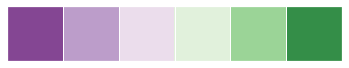

In [ ]:
palette = sns.color_palette("PRGn")
sns.palplot(palette)

In [ ]:
shop = data.loc[(data['Category']=='SHOPPING')]
ent = data.loc[(data['Category']=='ENTERTAINMENT')]
game = data.loc[(data['Category']=='GAME')]
photo = data.loc[(data['Category']=='PHOTOGRAPHY')]
edu =  data.loc[(data['Category']=='EDUCATION')]
famous = pd.concat([shop,ent,game,photo,edu],axis = 0)

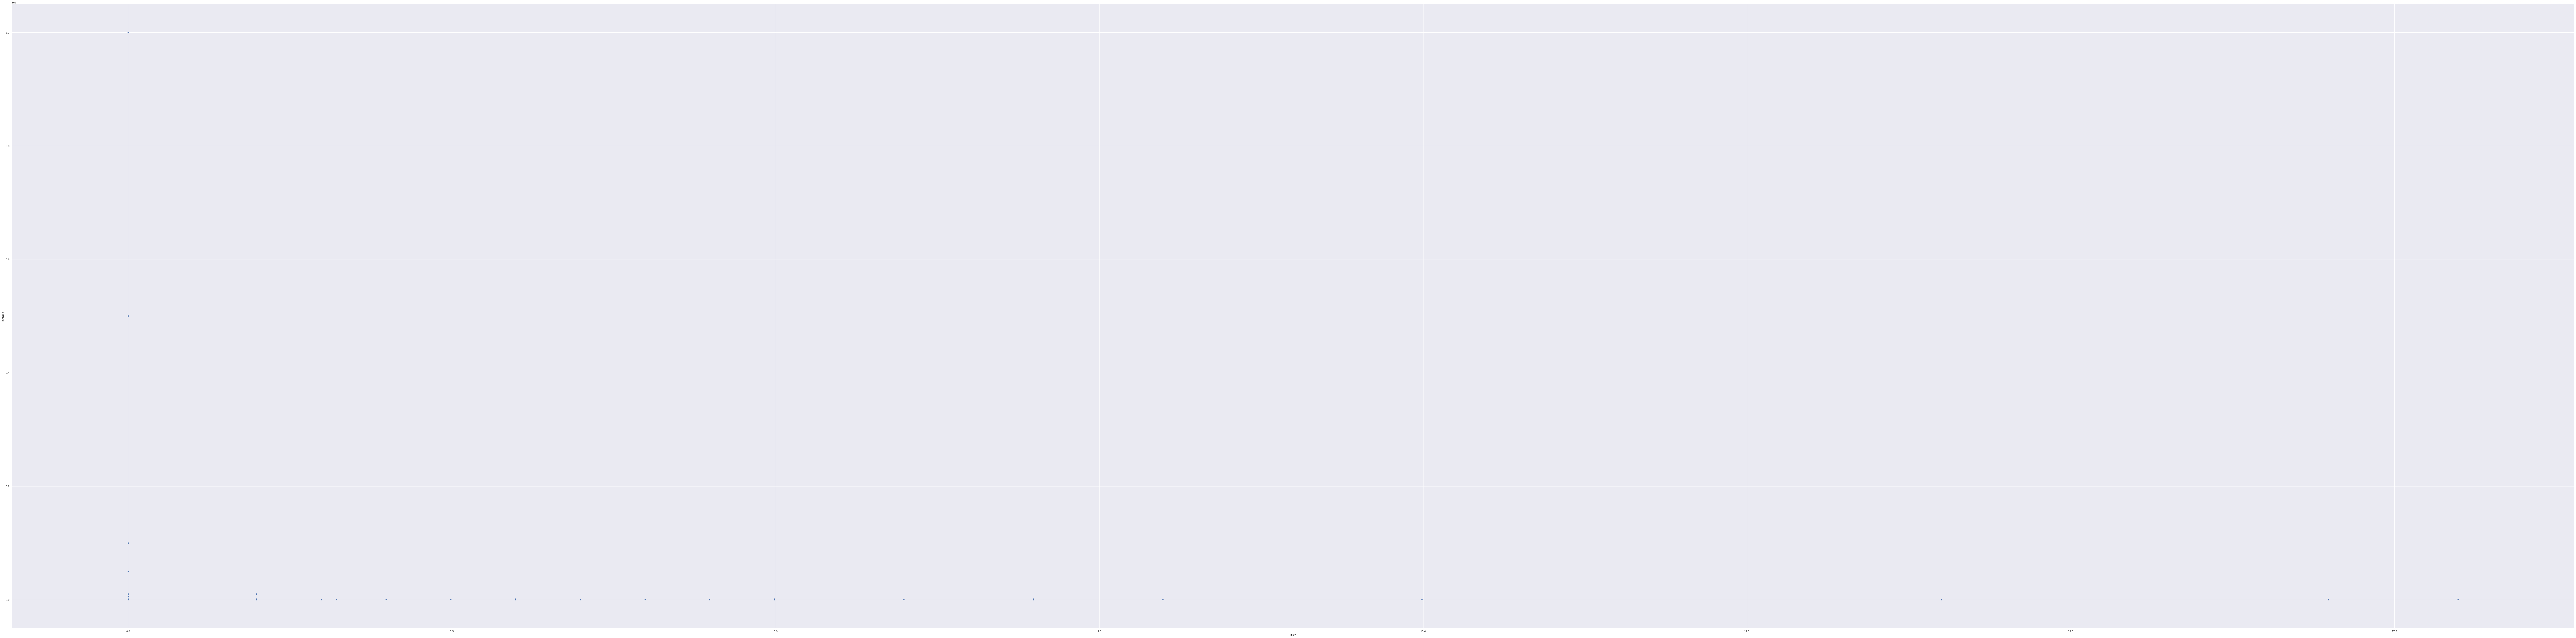

In [ ]:
sns.scatterplot(data = game, x ='Price',y = 'Installs')
sns.set(rc = {'figure.figsize':(80,50)})
plt.show()

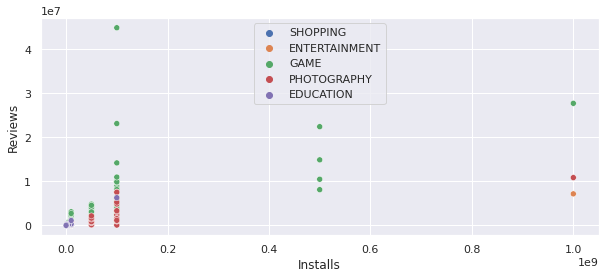

In [ ]:
sns.scatterplot(data = famous, x = 'Installs', y = 'Reviews',hue = 'Category')
plt.legend()
plt.show()

In [ ]:
smolf = famous.loc[famous['Installs']<1000000]

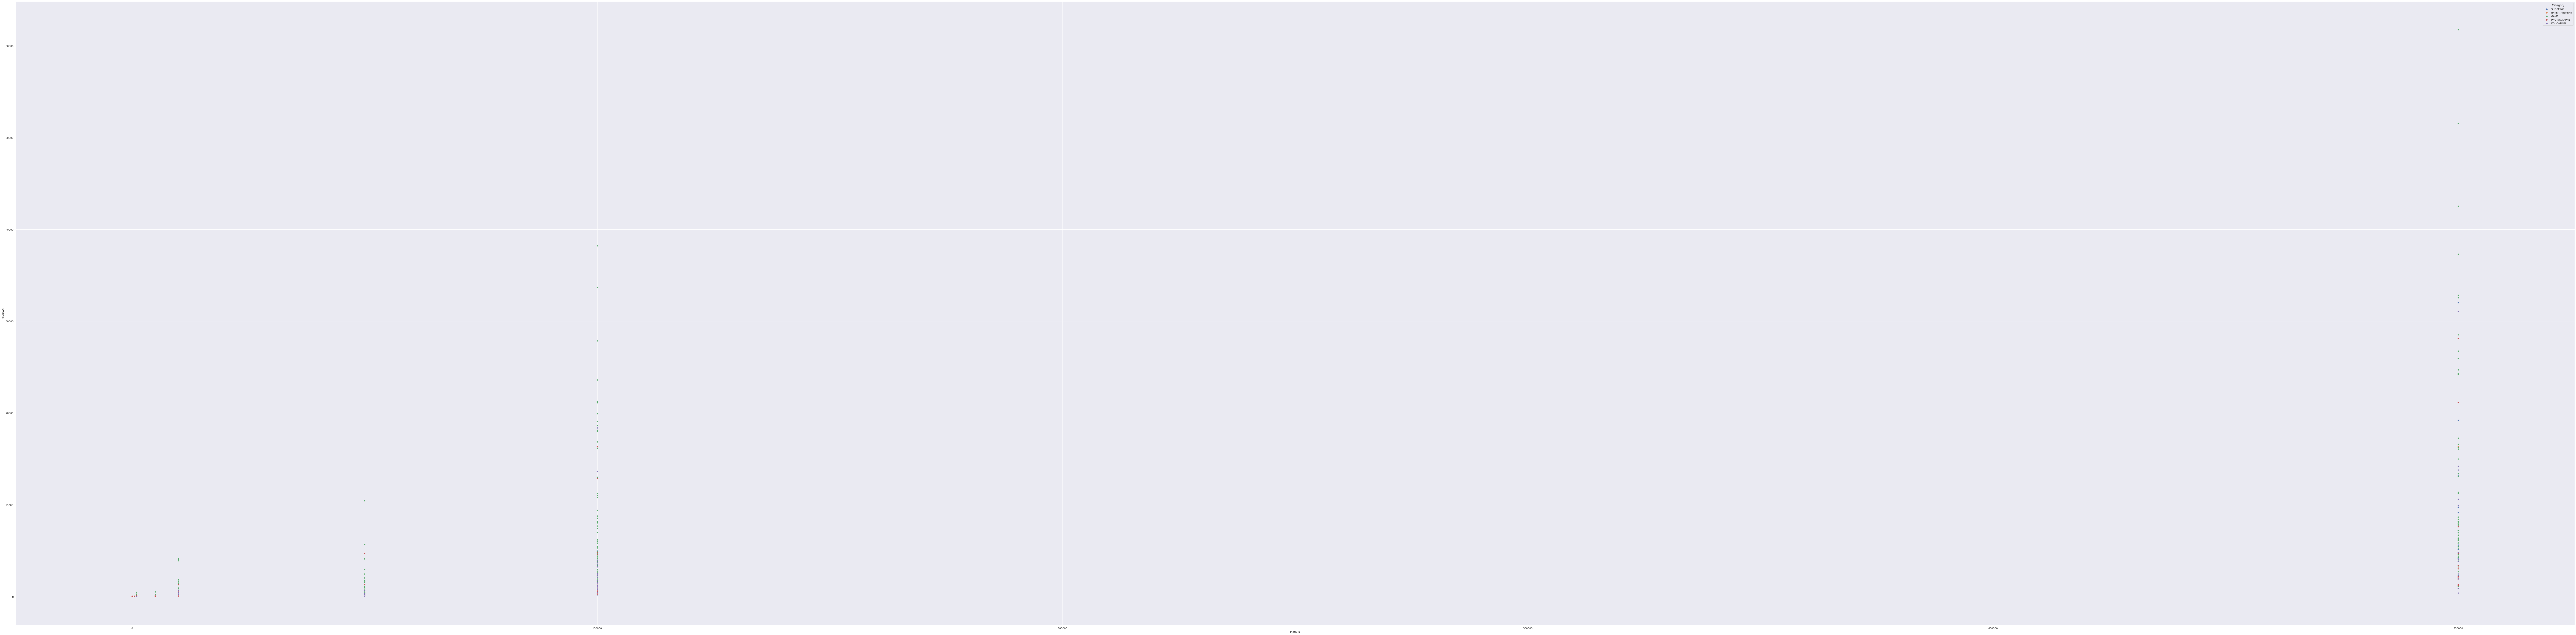

In [ ]:
sns.scatterplot(data = smolf, x = 'Installs', y = 'Reviews',hue = 'Category')
plt.show()
#백만이상의값 뺌

In [ ]:
import sys
def dollar(dollar):
  if dollar.isalpha() :
    return 0
  if dollar != '0':
   return dollar[1:]
  else :
   return 0

In [ ]:
data['Price'] = data['Price'].apply(dollar)

In [ ]:
data['Price'].astype(float)
#가격 숫자로 바꿈.. 가격과 관계성 있을까봐 

8821    0.00
7807    0.00
5152    0.00
7145    0.00
7428    0.00
        ... 
8592    0.00
8583    0.00
8573    0.00
4453    0.99
9003    0.00
Name: Price, Length: 9367, dtype: float64